In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [8]:
#Q 1--

X, y = load_iris(return_X_y=True)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("\nFirst 5 rows of X:\n", X[:5])
print("\nFirst 5 elements of y:\n", y[:])



Shape of X: (150, 4)
Shape of y: (150,)

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 elements of y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(X)
kmeans.cluster_centers_
pred = kmeans.fit_predict(X)
pred




array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0])

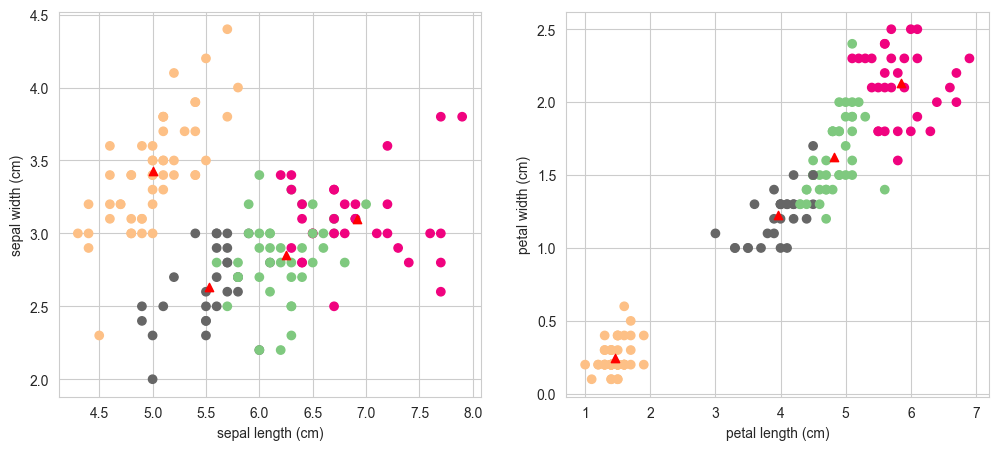

In [15]:
plt.figure(figsize=(12, 5))

# First subplot for petal length and petal width
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

# Second subplot for sepal length and sepal width
plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()

In [17]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
# Evaluate clustering
ari = adjusted_rand_score(y, pred)
nmi = normalized_mutual_info_score(y, pred)

print(f'Adjusted Rand Index (ARI): {ari:.4f}')
print(f'Normalized Mutual Information (NMI): {nmi:.4f}')

# Confusion matrix to visualize the clustering against actual labels
cmatrix = confusion_matrix(y, pred)
print('Confusion Matrix:\n', cmatrix)

Adjusted Rand Index (ARI): 0.6498
Normalized Mutual Information (NMI): 0.7219
Confusion Matrix:
 [[ 0 50  0  0]
 [23  0  0 27]
 [17  0 32  1]
 [ 0  0  0  0]]


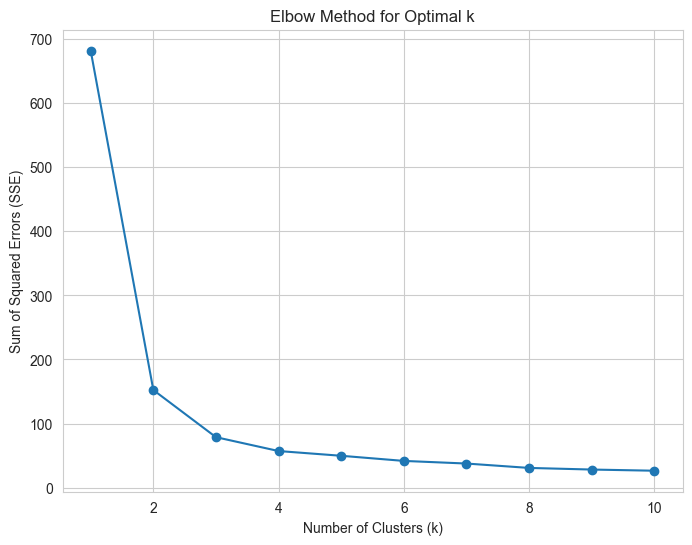

In [18]:
# Q 2---

#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X)
	sse.append(km.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

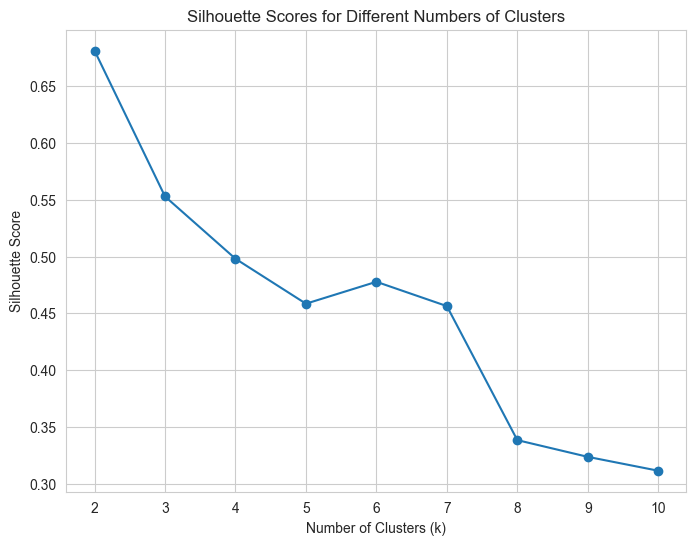

Optimal number of clusters based on Silhouette Score: 2


In [19]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for a range of cluster numbers
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=2)
    preds = km.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_k}')

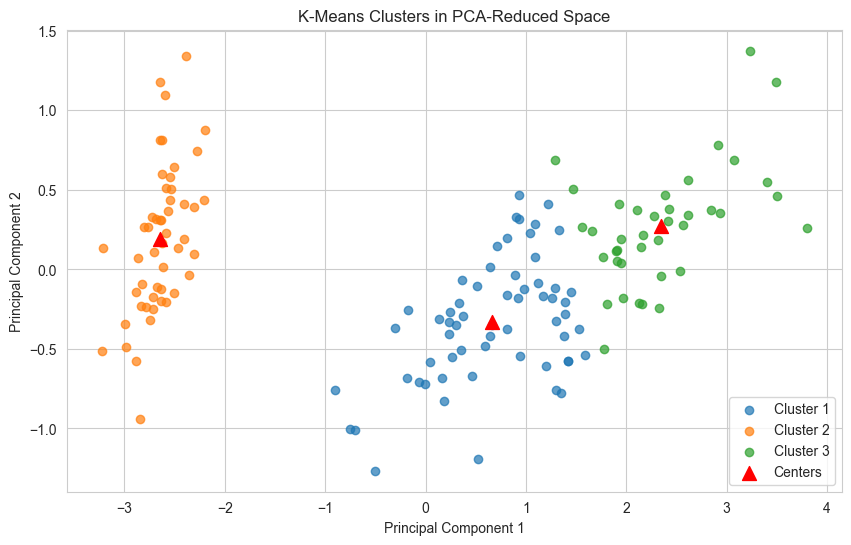

In [22]:
#Q 3--
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
y = iris.target
# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=2)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in np.unique(clusters):
    subset = X_pca[clusters == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Cluster {cluster+1}', alpha=0.7)

# Mark the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='^', c='red', s=100, label='Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.legend()
plt.show()



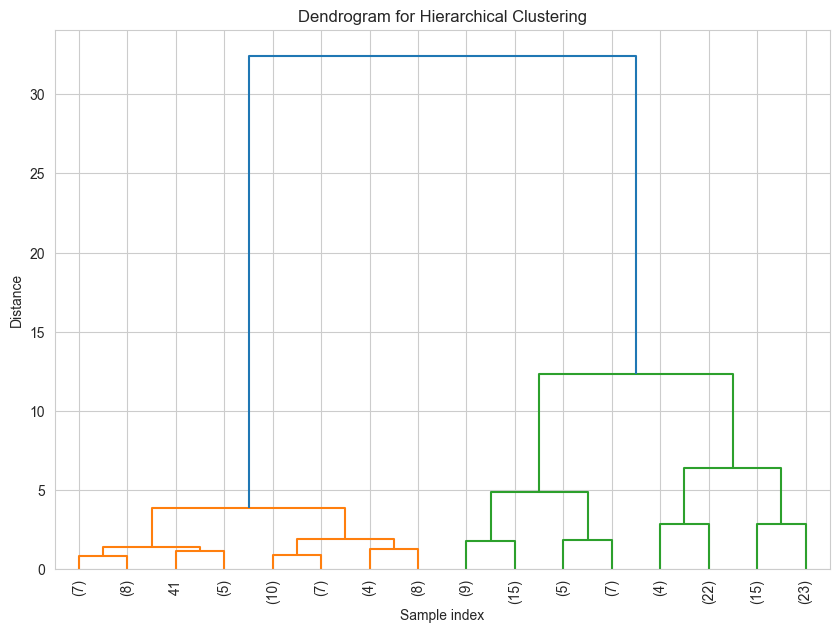

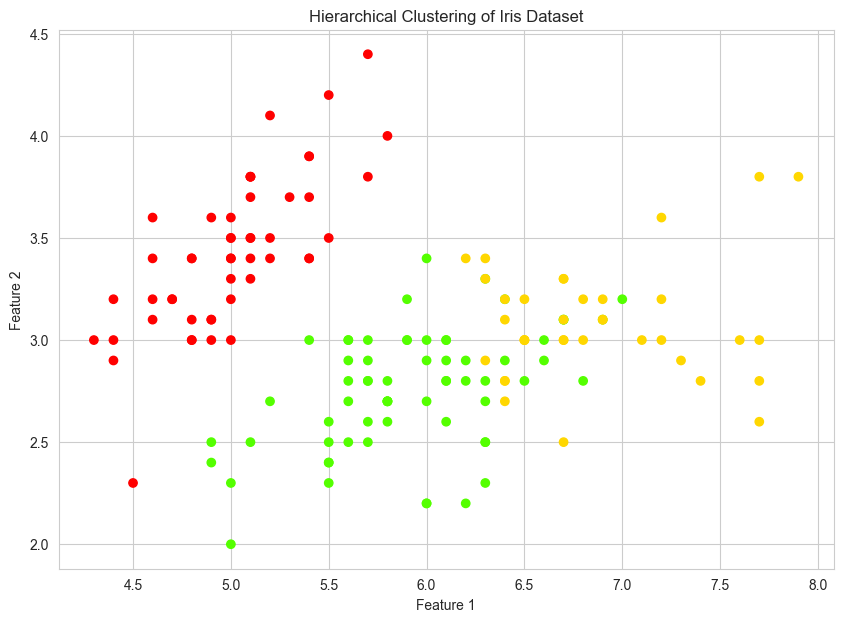

In [23]:
#Q 4--

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


iris = load_iris()
X = iris.data

# Perform hierarchical clustering
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

max_d = 7.5
clusters = fcluster(Z, max_d, criterion='distance')

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


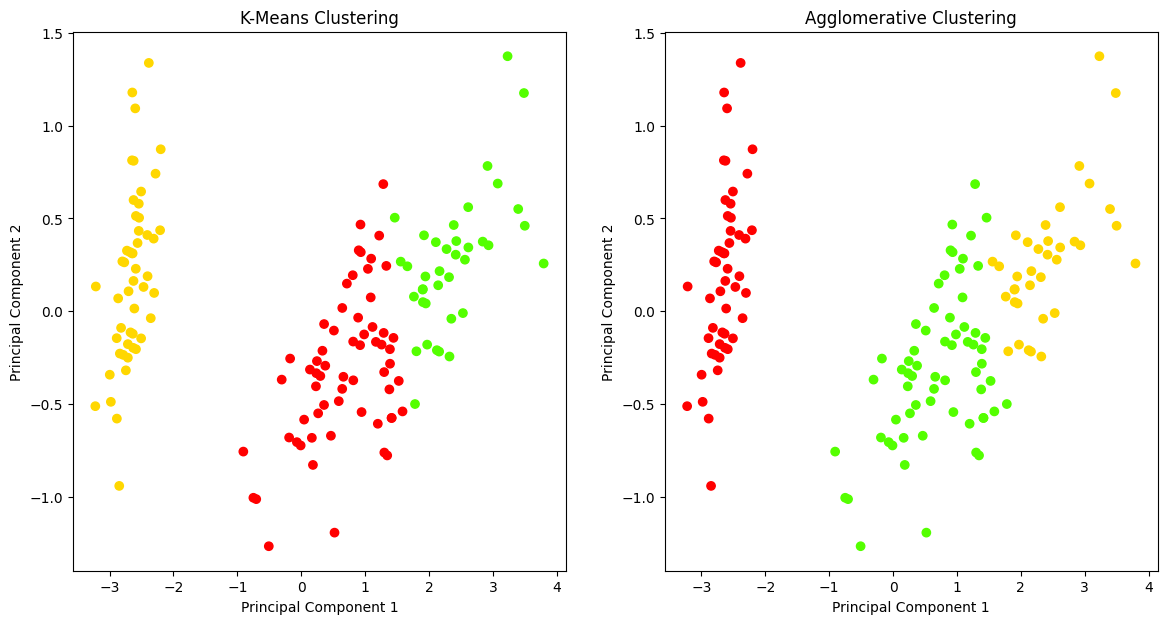

K-Means ARI: 0.730
K-Means Silhouette Score: 0.553
Agglomerative Clustering ARI: 0.731
Agglomerative Clustering Silhouette Score: 0.554


In [1]:
#Q 5--

#-- K-Means Clustering: Performed better in terms of ARI and Silhouette Score
# indicating that it formed more accurate and well-defined clusters for the Iris dataset.

#-- Agglomerative Hierarchical Clustering: Provided useful hierarchical 
# insights through the dendrogram but had lower performance metrics.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


iris = load_iris()
X = iris.data
y = iris.target

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
kmeans_silhouette = silhouette_score(X, kmeans_clusters)

# Perform hierarchical clustering
Z = linkage(X, method='ward')
max_d = 7.5
agg_clusters = fcluster(Z, max_d, criterion='distance')
agg_ari = adjusted_rand_score(y, agg_clusters)
agg_silhouette = silhouette_score(X, agg_clusters)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='prism')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clusters, cmap='prism')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

print(f'K-Means ARI: {kmeans_ari:.3f}')
print(f'K-Means Silhouette Score: {kmeans_silhouette:.3f}')
print(f'Agglomerative Clustering ARI: {agg_ari:.3f}')
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette:.3f}')

